In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import torch
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import FeedForward, SiameseDataSet, SiameseModel, seed_everything
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
from sklearn.datasets import make_circles

np.random.seed(42)

X, y = make_circles(n_samples=4000, factor=.3, noise=.25)
OneHot = OneHotEncoder(sparse=False)
y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [4]:
y.shape

(4000, 2)

In [5]:
np.sum(y, axis=0)

array([2000., 2000.])

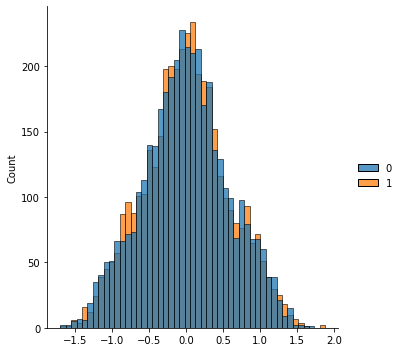

In [6]:
sns.displot(X)

In [7]:
# Test Effect of making X non-negative
# X = X + 2

# Define and Train Model

In [8]:
seed_everything(69)

In [9]:
MyFeedForward = FeedForward(2, [3, 2])

In [10]:
MyFeedForward

FeedForward(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=2, bias=True)
  )
)

In [11]:
MySNN = SiameseModel(MyFeedForward, predict_unknown = False, class_min_train=5, 
                     n_example_predict=10, learning_rate=1.0e-3, num_epochs = 20, batch_size = 1000, rand_seed=142)

In [12]:
# list(MySNN.logistic.parameters()) + list(MySNN.model.parameters())

In [13]:
MyTrainer = Trainer(model = MySNN, scale_X = False, use_pca = False, n_components = 2)

In [14]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [15]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [16]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Training Encoder
#########################################
Epoch 1 of 20
__Training__
2021-03-08 04:18:45
MEAN LOSS: 0.7201148315429687
__Validation__
2021-03-08 04:18:46
MEAN LOSS: 0.7153754590546946
#########################################
Epoch 2 of 20
__Training__
2021-03-08 04:18:46
MEAN LOSS: 0.7149616485595703
__Validation__
2021-03-08 04:18:46
MEAN LOSS: 0.7110531151992152
#########################################
Epoch 3 of 20
__Training__
2021-03-08 04:18:46
MEAN LOSS: 0.7108653991699219
__Validation__
2021-03-08 04:18:46
MEAN LOSS: 0.7075891572006322
#########################################
Epoch 4 of 20
__Training__
2021-03-08 04:18:46
MEAN LOSS: 0.7075290496826172
__Validation__
2021-03-08 04:18:47
MEAN LOSS: 0.7047389499997363
#########################################
Epoch 5 of 20
__Training__
2021-03-08 04:18:47
MEAN LOSS: 0.7047545837402344
__Validation__
2021-03-08 04:18:47
MEAN LOSS: 0.7023667988747117
######################################

MEAN LOSS: 0.7072912414550782
__Validation__
2021-03-08 04:19:06
MEAN LOSS: 0.7047318219065559
#########################################
Epoch 5 of 20
__Training__
2021-03-08 04:19:06
MEAN LOSS: 0.7045771087646484
__Validation__
2021-03-08 04:19:07
MEAN LOSS: 0.7023764540760716
#########################################
Epoch 6 of 20
__Training__
2021-03-08 04:19:07
MEAN LOSS: 0.7023068237304687
__Validation__
2021-03-08 04:19:07
MEAN LOSS: 0.7004193736023993
#########################################
Epoch 7 of 20
__Training__
2021-03-08 04:19:07
MEAN LOSS: 0.7004180023193359
__Validation__
2021-03-08 04:19:08
MEAN LOSS: 0.698808795369283
#########################################
Epoch 8 of 20
__Training__
2021-03-08 04:19:08
MEAN LOSS: 0.6988614624023437
__Validation__
2021-03-08 04:19:08
MEAN LOSS: 0.6975004125778789
#########################################
Epoch 9 of 20
__Training__
2021-03-08 04:19:08
MEAN LOSS: 0.6975941284179688
__Validation__
2021-03-08 04:19:08
MEAN LOSS: 0.696

MEAN LOSS: 0.6988210540771485
__Validation__
2021-03-08 04:19:27
MEAN LOSS: 0.6975504259715523
#########################################
Epoch 9 of 20
__Training__
2021-03-08 04:19:27
MEAN LOSS: 0.6975578430175782
__Validation__
2021-03-08 04:19:28
MEAN LOSS: 0.6964835124869909
#########################################
Epoch 10 of 20
__Training__
2021-03-08 04:19:28
MEAN LOSS: 0.6965455352783203
__Validation__
2021-03-08 04:19:28
MEAN LOSS: 0.6956429743316128
#########################################
Epoch 11 of 20
__Training__
2021-03-08 04:19:28
MEAN LOSS: 0.695744384765625
__Validation__
2021-03-08 04:19:29
MEAN LOSS: 0.694992642269598
#########################################
Epoch 12 of 20
__Training__
2021-03-08 04:19:29
MEAN LOSS: 0.6951165924072266
__Validation__
2021-03-08 04:19:29
MEAN LOSS: 0.694497617486358
#########################################
Epoch 13 of 20
__Training__
2021-03-08 04:19:29
MEAN LOSS: 0.6946287994384766
__Validation__
2021-03-08 04:19:30
MEAN LOSS: 0.6

In [17]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,0.517188,train
1,0.597500,train
2,0.434375,train
3,0.545937,train
4,0.570312,train
0,0.512500,test
1,0.586250,test
2,0.452500,test
3,0.531250,test
4,0.596250,test


<AxesSubplot:xlabel='stage', ylabel='score'>

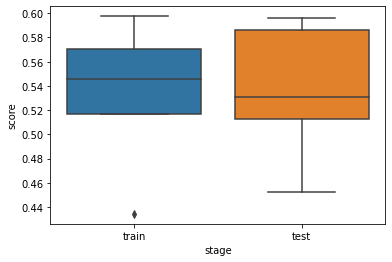

In [18]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

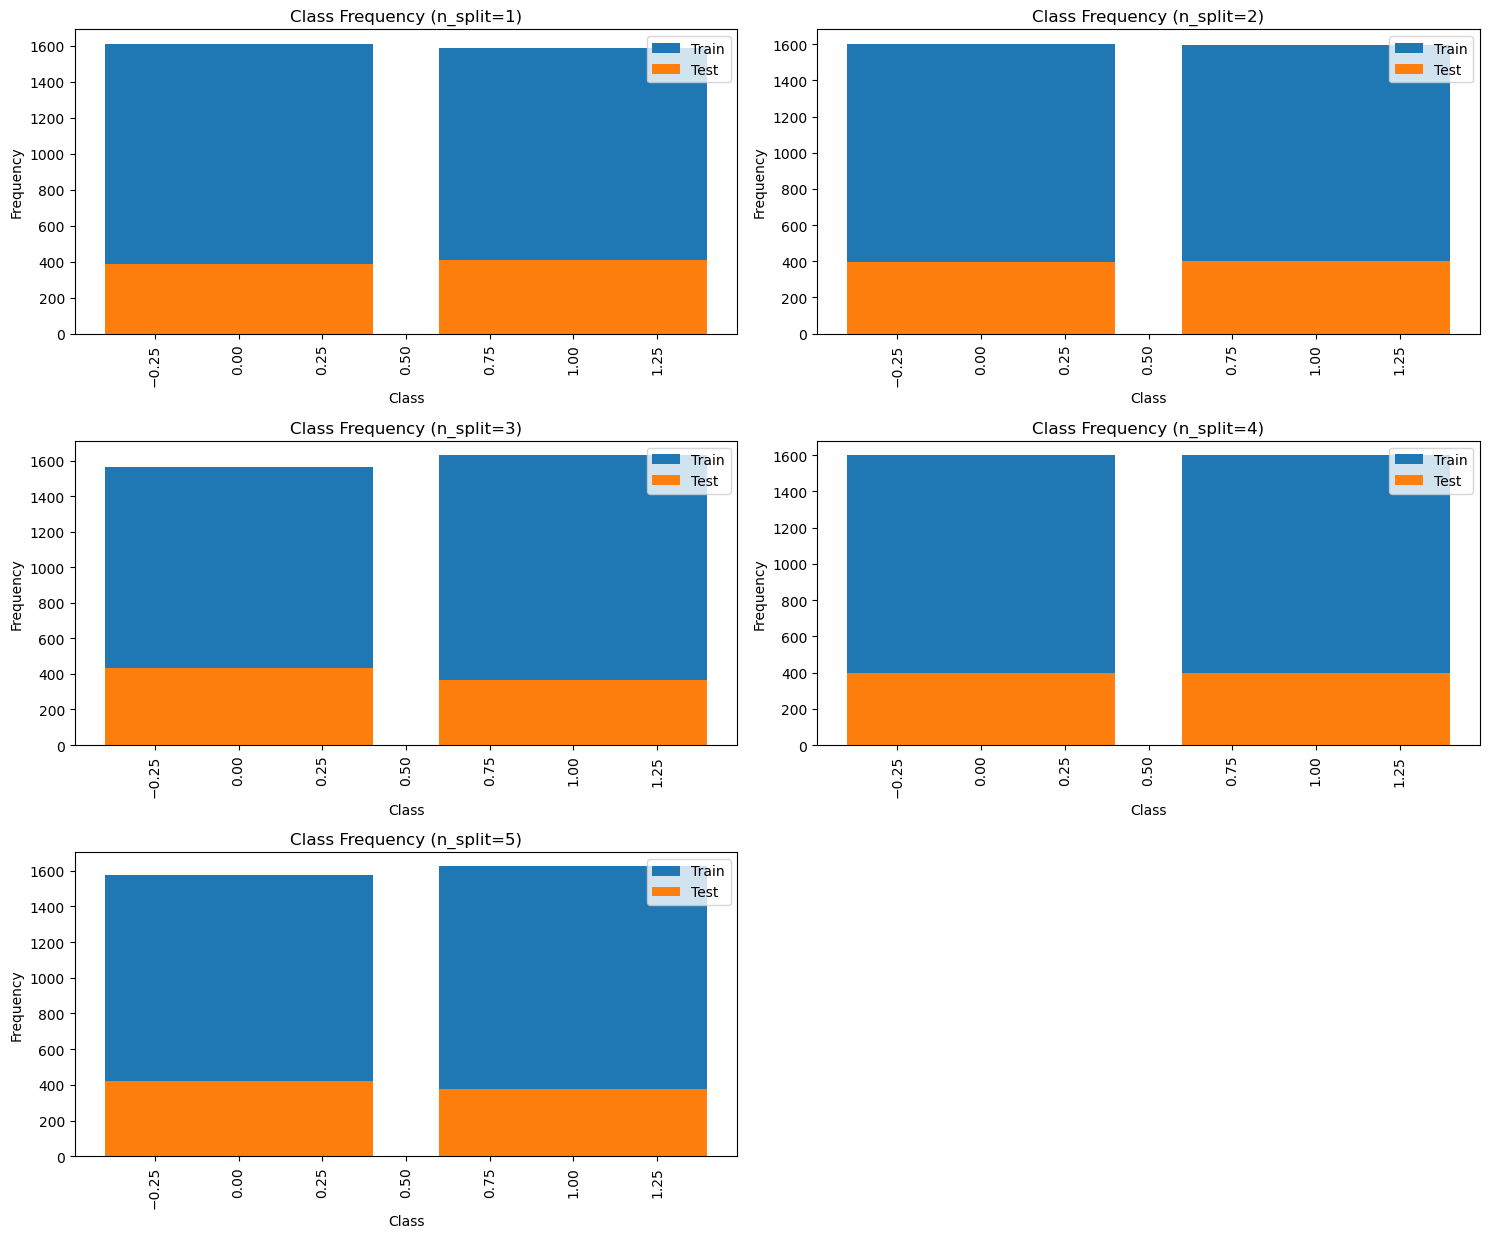

In [19]:
MyMultiTrainTester.plot_class_freq(normalize=True)

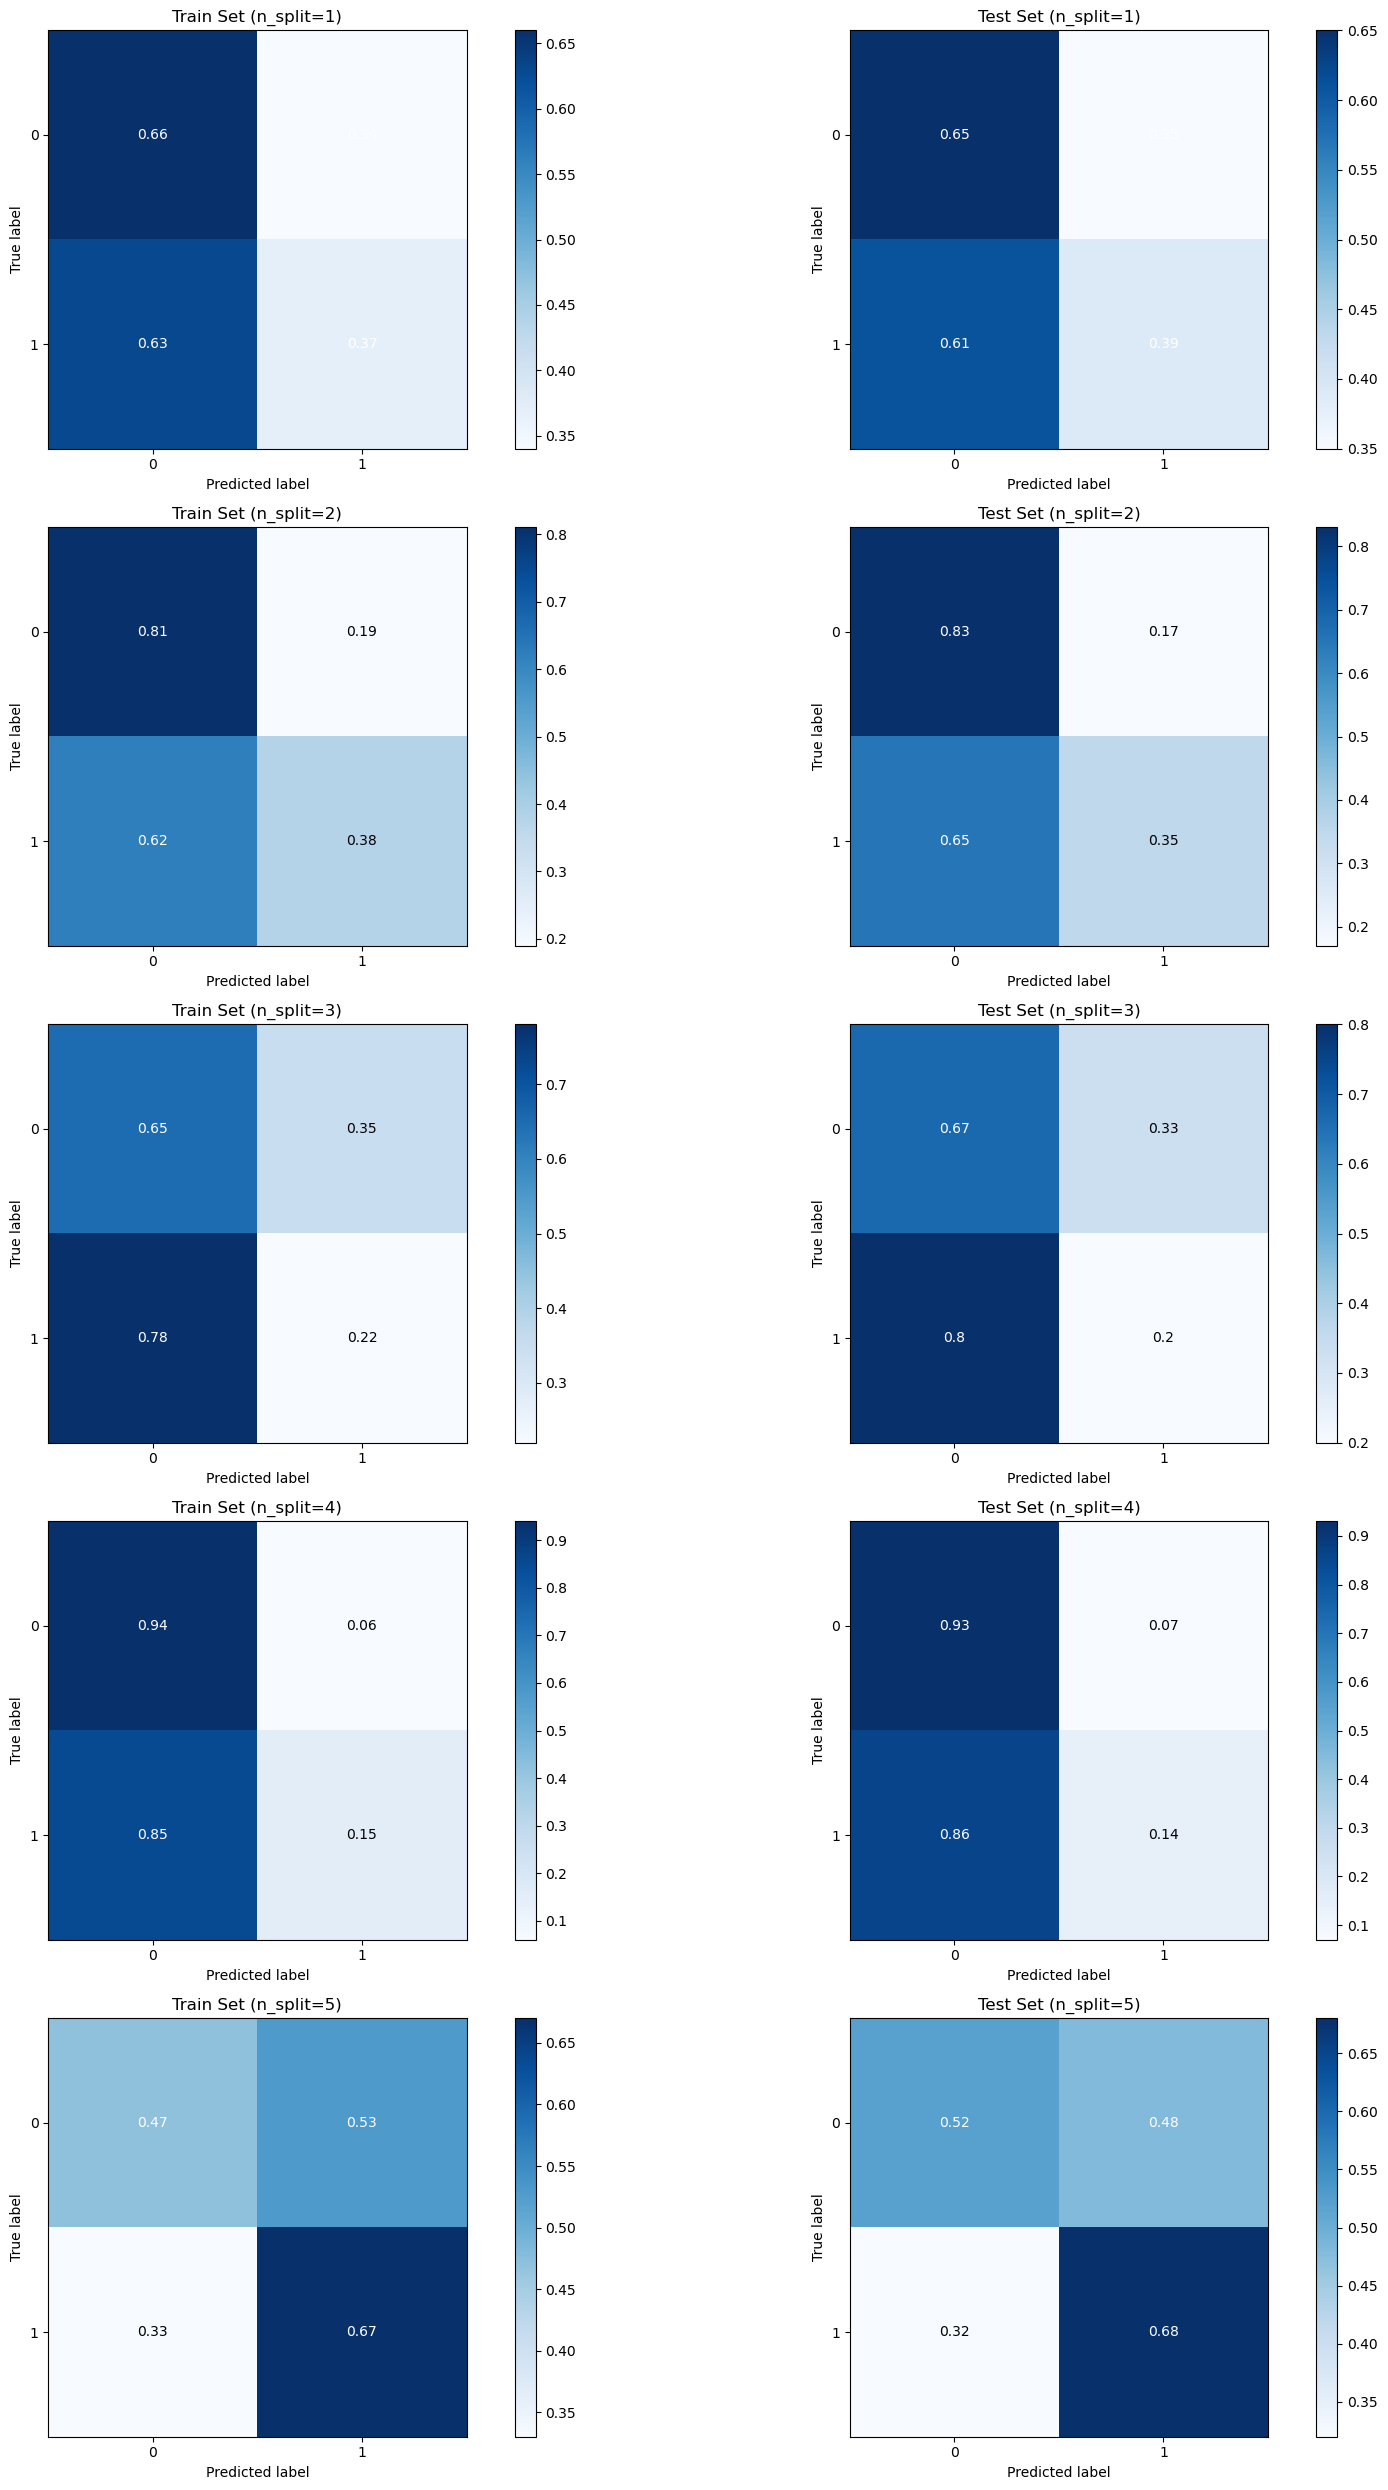

In [20]:
MyMultiTrainTester.plot_confusion(normalize=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


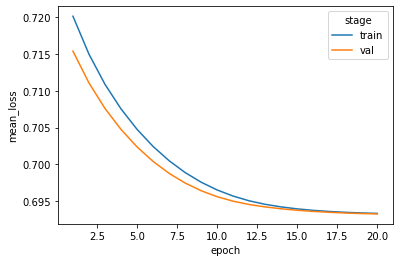

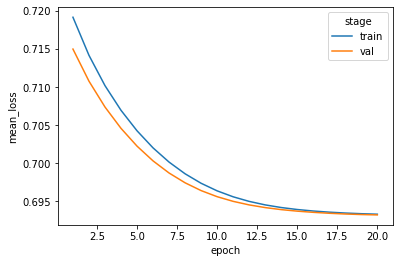

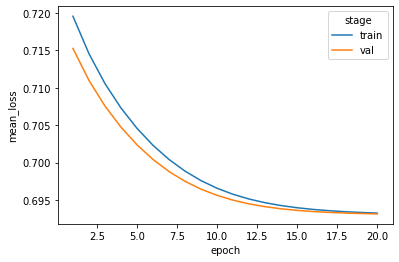

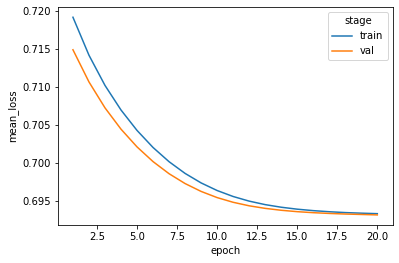

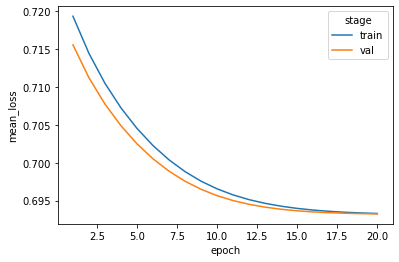

In [21]:
for i, trainer in enumerate(MyMultiTrainTester.TrainerList):
    plt.figure(i)
    print(sns.lineplot(data=trainer.model.TrainStats, x='epoch', y='mean_loss', hue = 'stage'))

### Examine Data In Encoded Space

In [22]:
Trainer_use = MyMultiTrainTester.TrainerList[0]

In [23]:
X_transform = Trainer_use.transform_X(X)

In [24]:
X_encoded = Trainer_use.model.model.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [25]:
# X_encoded = MyFeedForward.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [26]:
X_encoded.shape

(4000, 2)

In [27]:
y_label = Trainer_use.model.one_hot.inverse_transform(y).astype('str')

In [28]:
y_pred = Trainer_use.model.predict(X_transform)
y_pred = Trainer_use.model.one_hot.inverse_transform(y_pred).astype('str')

In [29]:
X_enc_df = pd.DataFrame(X_encoded, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
X_enc_df['y'] = y_label
X_enc_df['y_pred'] = y_pred

In [30]:
X_enc_df

,X1,X2,y,y_pred
0,0.0,0.000000,0,0
1,0.0,0.173176,1,1
2,0.0,0.014575,0,0
3,0.0,0.108122,1,1
4,0.0,0.014575,1,0
...,...,...,...,...
3995,0.0,0.014575,0,0
3996,0.0,0.014575,0,0
3997,0.0,0.014575,0,0
3998,0.0,0.099771,1,1


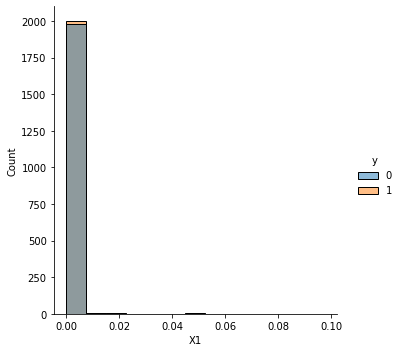

In [31]:
sns.displot(data=X_enc_df, x='X1', hue='y')

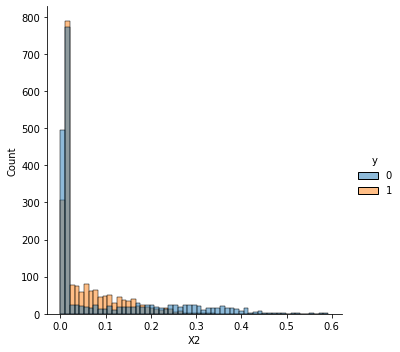

In [32]:
sns.displot(data=X_enc_df, x='X2', hue='y')

In [33]:
def do_plot(df, x, y, hue):
    if x in df.columns and y in df.columns and hue in df.columns:
        sns.scatterplot(data=df, x=x, y=y, hue = hue)

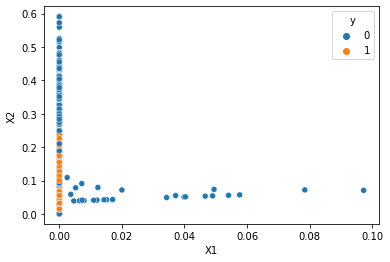

In [34]:
do_plot(X_enc_df, 'X1', 'X2', 'y')

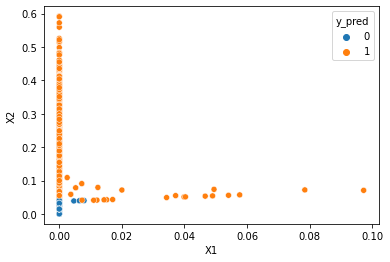

In [35]:
do_plot(X_enc_df, 'X1', 'X2', 'y_pred')

In [36]:
do_plot(X_enc_df, 'X2', 'X3', 'y')

In [37]:
do_plot(X_enc_df, 'X3', 'X4', 'y')

### Examine Data In Original Space

In [38]:
X_df = pd.DataFrame(X, columns = ['X1', 'X2'])
X_df['y'] = y_label

<AxesSubplot:xlabel='X1', ylabel='X2'>

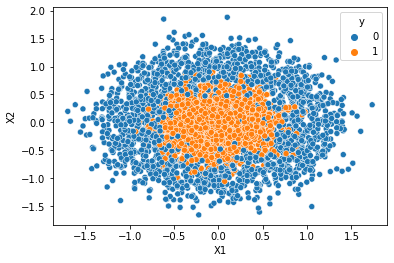

In [39]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue = 'y')